In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

# Practica II - Data Exploration Part 2

_ _ _
___
_ _ _


## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.
   
#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())

not_norm_case_data_Boston = case_data_Boston.copy()

case_data_Boston = case_data_Boston_norm

##### 1.2.2.1.- Creating Targets

In [6]:
# not normalized

temp_targets = p_plt.make_targets(not_norm_case_data_Boston.iloc[:, 4], samples=3)
not_norm_case_data_Boston["target"] = temp_targets

# normalized

temp_targets = p_plt.make_targets(case_data_Boston.iloc[:, 4], samples=3)
case_data_Boston["target"] = temp_targets

### 1.3 Data Exploration

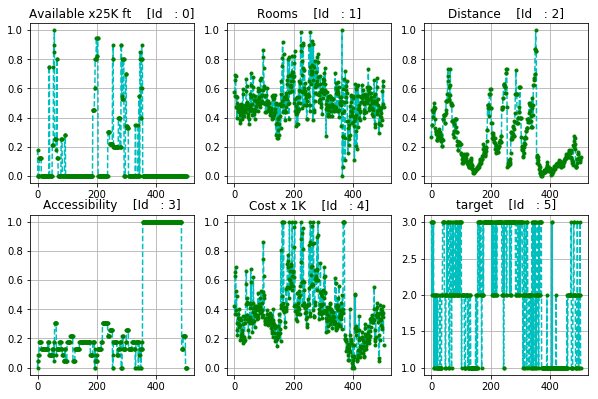

In [7]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

#### 1.3.1 Histogram

 - It have outliers?
 
 > Yes , except in the 4th column (Accesibility)

***Below : 1rst Not Normalize Data, 2nd Normalize Data (normal base)***

##### PLOT

##### Type A

C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\10659682\Documents\gitrepos\datamining-p3\personal_plotter.py:118: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  temp_obj.plot(x,mlab.normpdf(x, mu, sigma), "r")
C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\10659682\Documents\gitrepos\datamining-p3\personal_plotter.py:118: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  temp_obj.plot(x,mlab.normpdf(x, mu, sigma), "r")
C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced

<module 'matplotlib.pyplot' from 'C:\\Users\\10659682\\Documents\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

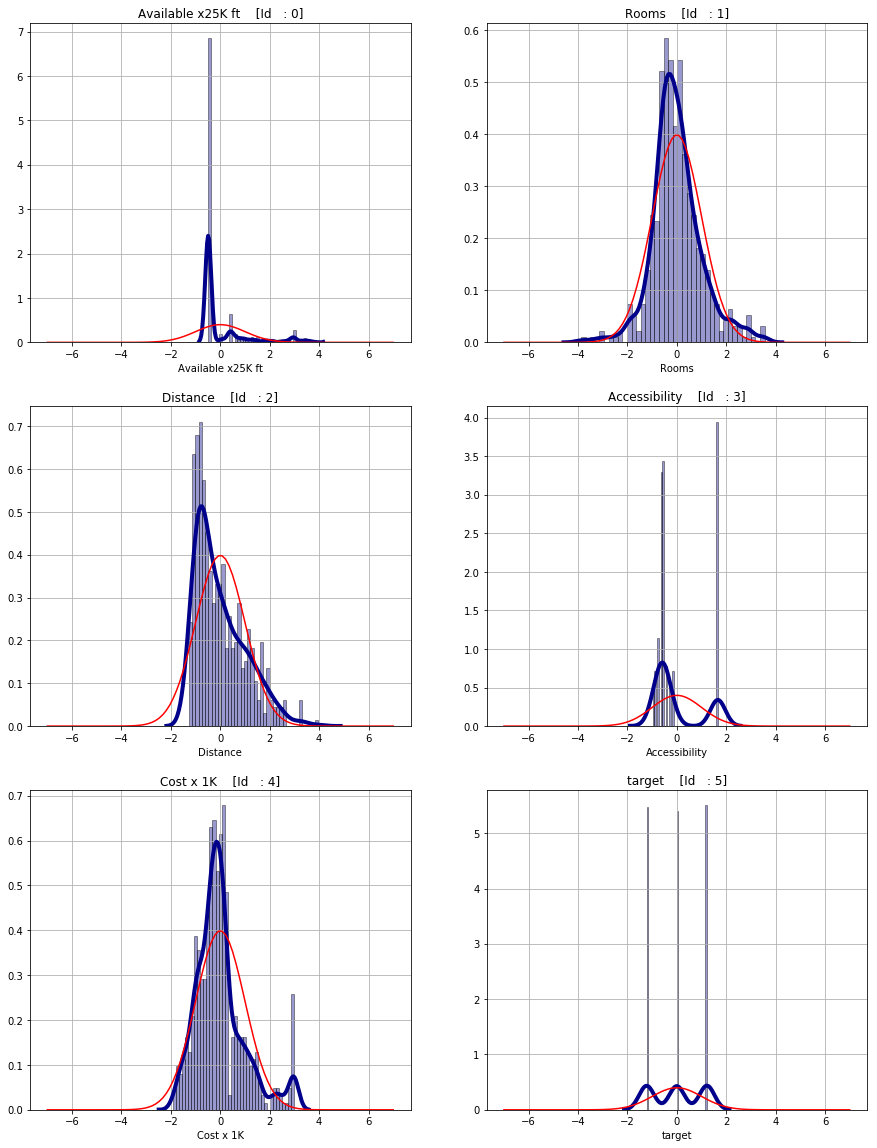

In [8]:
in_normal_base_case_data_Boston = p_plt.to_normal_base(case_data_Boston)

p_plt.skew_demo(in_normal_base_case_data_Boston, 
                plot_size=(15,20), 
                grid_subplot=[3,2],
                grid=True)

In [9]:
target_names = case_data_Boston['target'].unique()
columns = case_data_Boston.columns.tolist()

##### Type B

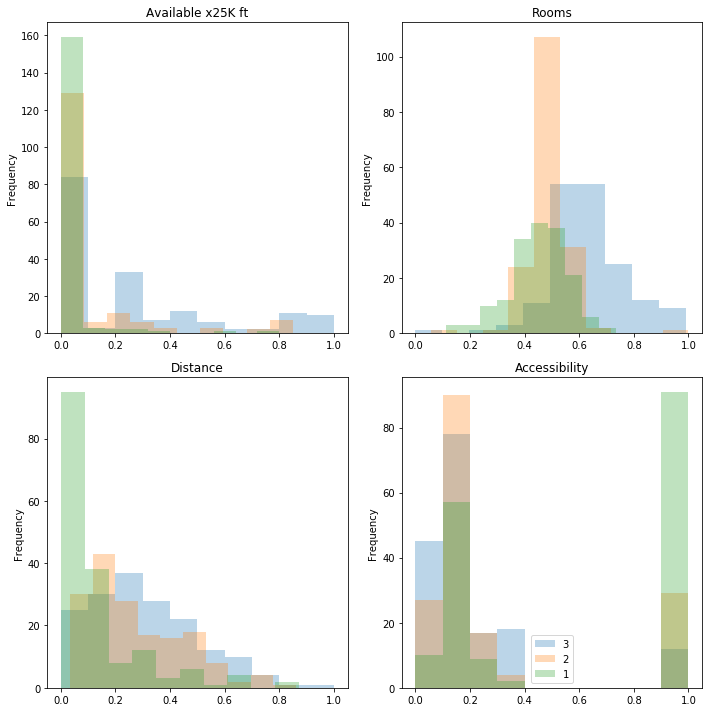

In [10]:
plt.figure(figsize=(10, 10))
for col in range(1,5):
    ax = plt.subplot(2, 2, col)
    ax.set_title(columns[col-1])
    for c in case_data_Boston.target.unique():
        case_data_Boston.loc[ case_data_Boston.target == c, columns[col-1]].plot.hist(alpha=0.3)
    
plt.legend(target_names)
plt.tight_layout()
plt.show()

- the outliers are really Outliers?
    * Available: No, it has a Right Skew
    * Rooms: Apparently yes, but, could be just a distribution error
    * Distance: considering the max value is in the range of acceptable values, its possible affirm, indeed, it has real outliers.
    * Accessibility: Being a discrete set of values, doesn't show significant outliers, (even its possible it doesn't have any)
    * Cost x 1K: Similar to the *Available* set of values, it has a Right Skew

***See Below for referential data (the main box in boxplot are values between 25% and 75 Quartile)***

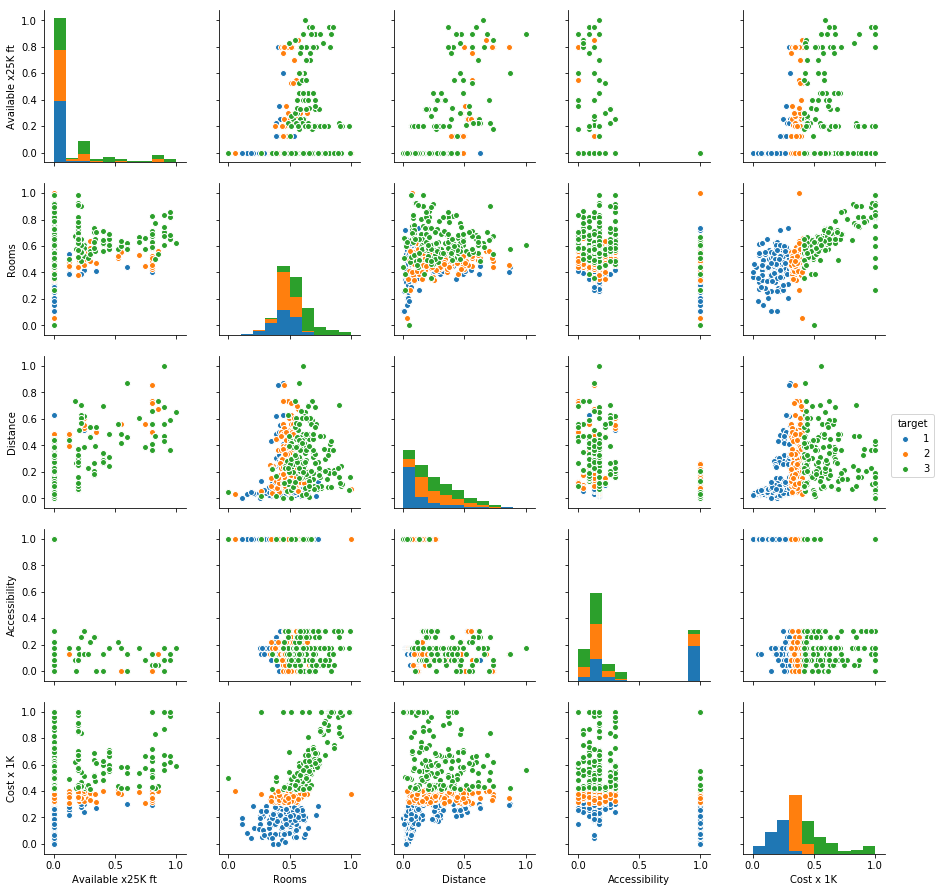

In [11]:
sns.pairplot(data=case_data_Boston, vars=columns[:-1], hue='target')
plt.show()

In [12]:
stats = not_norm_case_data_Boston.describe()
print(stats)

       Available x25K ft       Rooms    Distance  Accessibility   Cost x 1K  \
count         506.000000  506.000000  506.000000     506.000000  506.000000   
mean           11.363636    6.284634    3.795043       9.549407   22.532806   
std            23.322453    0.702617    2.105710       8.707259    9.197104   
min             0.000000    3.561000    1.129600       1.000000    5.000000   
25%             0.000000    5.885500    2.100175       4.000000   17.025000   
50%             0.000000    6.208500    3.207450       5.000000   21.200000   
75%            12.500000    6.623500    5.188425      24.000000   25.000000   
max           100.000000    8.780000   12.126500      24.000000   50.000000   

           target  
count  506.000000  
mean     2.001976  
std      0.819319  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  


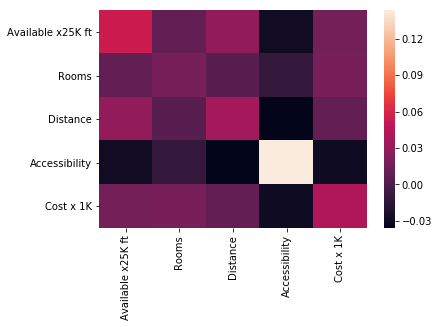

In [13]:
cov = case_data_Boston.iloc[:, :-1].cov()

sns.heatmap(cov)
plt.show()

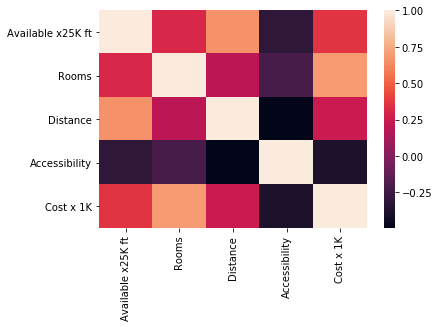

In [14]:
cor = case_data_Boston.iloc[:, :-1].corr()

sns.heatmap(cor)
plt.show()

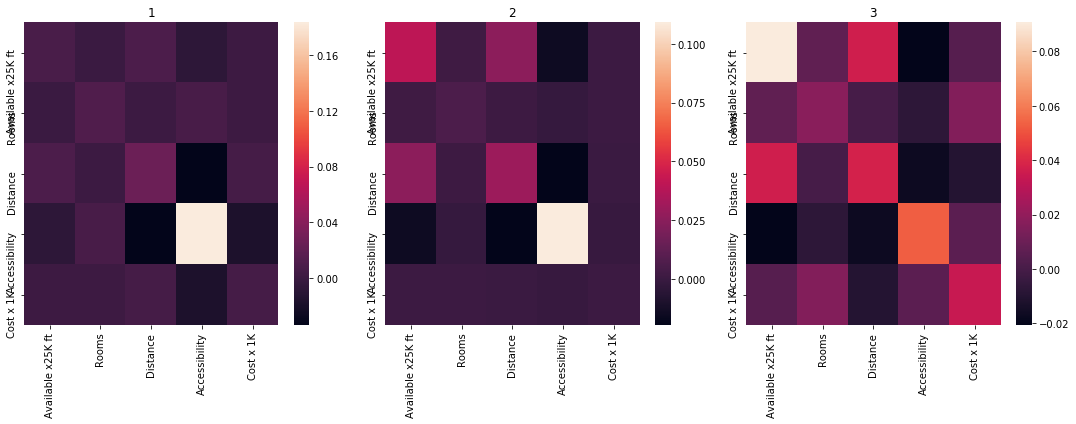

In [15]:
# covarianca por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(case_data_Boston.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cov = case_data_Boston.loc[ case_data_Boston.target == c, columns[:-1]].cov()
    sns.heatmap(cov)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

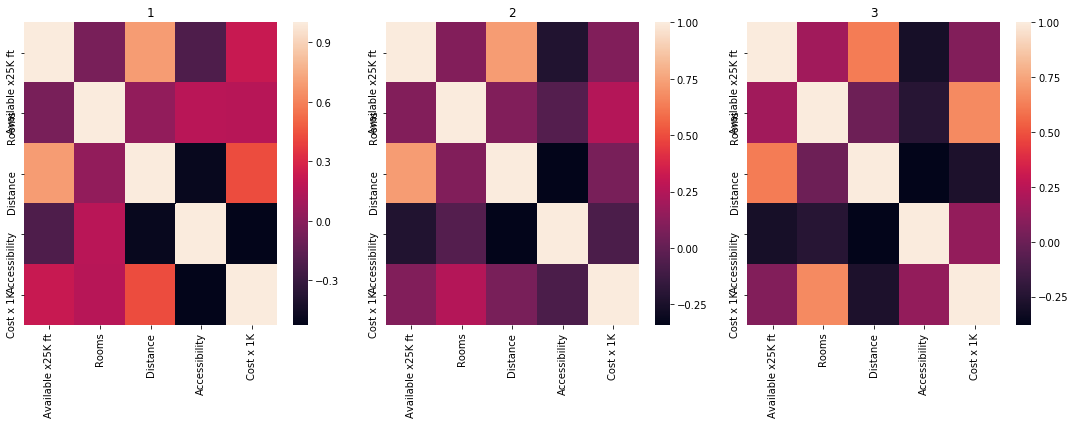

In [16]:
# correlacao por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(case_data_Boston.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cor = case_data_Boston.loc[ case_data_Boston.target == c, columns[:-1]].corr()
    sns.heatmap(cor)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

#### 1.3.2 Moment (1) :>> Mean

In [17]:
mean_Boston = case_data_Boston.mean()

##### PLOT

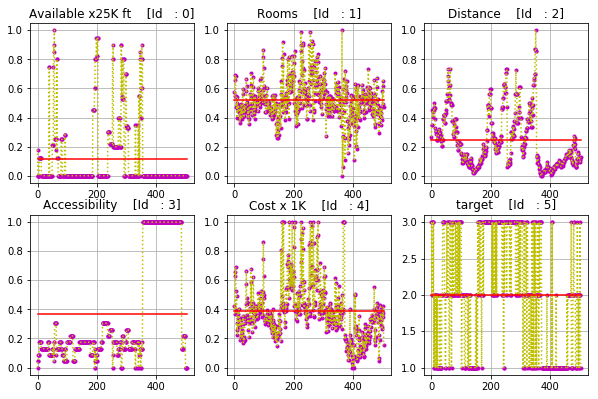

In [18]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.3 Moment(2) :>> Variance

In [19]:
variance_Boston = not_norm_case_data_Boston.var()
print("\033[1mVariance (not normalize)\033[0m \n\n", variance_Boston)

print("\n\n\t\t------\n\n")

variance_Boston = case_data_Boston.var()
print("\033[1mVariance (normalize)\033[0m \n\n", variance_Boston)

Variance (not normalize) 

 Available x25K ft    543.936814
Rooms                  0.493671
Distance               4.434015
Accessibility         75.816366
Cost x 1K             84.586724
target                 0.671283
dtype: float64


		------


Variance (normalize) 

 Available x25K ft    0.054394
Rooms                0.018124
Distance             0.036665
Accessibility        0.143320
Cost x 1K            0.041771
target               0.671283
dtype: float64




##### PLOT

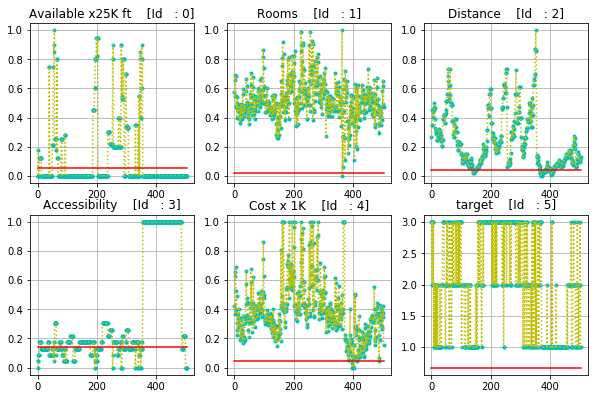

In [20]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True, constant_values=variance_Boston.values).show()


#### 1.3.4 Moment(3) :>> Skew

In [21]:
skew_Boston = case_data_Boston.skew()
print(skew_Boston)

Available x25K ft    2.225666
Rooms                0.403612
Distance             1.011781
Accessibility        1.004815
Cost x 1K            1.108098
target              -0.003650
dtype: float64


#### 1.3.5 Moment(4) :>> Kurtosis

In [22]:
kurt_Boston = case_data_Boston.kurtosis()
print(kurt_Boston)

Available x25K ft    4.031510
Rooms                1.891500
Distance             0.487941
Accessibility       -0.867232
Cost x 1K            1.495197
target              -1.510406
dtype: float64


##### PLOT

#### 1.3.6 Confidence interval

it is possible to see in the plot above the Confidence Interval ( $[μ - 2σ, μ + 2σ]$ )

### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Using the parameters ***Available & Rooms*** as variables in the formula:

$$ Available = av \land Rooms = ro $$

$$ \frac{av - \min{(av)}}{\max{(av)}} \cdot {ro} = \rho_{people} $$

the data is almost conclusive , but even if the Weak Hypothesis has been reinforced , the strong hypothesis has just been "supported".
    
 - Strong Hypothesis: + Near to, + People

 - Weak Hypothesis: - Near To, - People

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility.

In both cases, the values are enclosed almost in the confidence interval.

This hypotesis has been reinforced

#### 1.4.3 rent increased the more nearly you are?

yes, but this only happens in the left skew, if we check the right one; the expected behavior fails. It is possible to say this hypothesis remains inconclusive (still, it's more close to reach some conclusion).

#### 1.5 Issues

* The data isn't normalize
* Have NaN values
* Small and not so detailed dictionary of variables 

_ _ _
___
_ _ _


## 2.- Data 2 - Instituições de Educação Superior
### 2.1.- Retrieving Data

#### 2.1.1.- Reading Data

In [23]:
try :
    ieducations_dataset = pd.read_csv("./microdados_censo_superior_2014/2014/DADOS/DM_IES.CSV", sep='|', encoding='latin1')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 2.1.2.- Data Labels

In [24]:
ieducationals_descriptions = pd.read_excel("./microdados_censo_superior_2014/2014/ANEXOS/ANEXO I/ANEXO I - 2014.xlsx", encoding='latin1')
ieducationals_descriptions.columns = ieducationals_descriptions.iloc[0,:]
ieducationals_descriptions = ieducationals_descriptions.reindex(ieducationals_descriptions.index.drop(0))
ieducationals_descriptions

,N,Nome da Variável,Descrição da Variável,Tipo,Tam.(1),Categorias
1,DADOS DA IES,NaN,NaN,NaN,NaN,NaN
2,1,CO_IES,Código único de identificação da IES,Num,8,NaN
3,2,NO_IES,Nome da IES,Char,200,NaN
4,3,SGL_IES,Sigla da IES,Char,20,NaN
5,4,CO_MANTENEDORA,Código único de identificação da mantenedora,Num,8,NaN
6,5,NO_MANTENEDORA,Nome da mantenedora,Char,200,NaN
7,6,CO_CATEGORIA_ADMINISTRATIVA,Código da Categoria Administrativa,Num,8,1. Pública Federal
8,NaN,NaN,NaN,NaN,NaN,2. Pública Estadual
9,NaN,NaN,NaN,NaN,NaN,3. Pública Municipal
10,NaN,NaN,NaN,NaN,NaN,4. Privada com fins lucrativos


#### 2.1.3.- Viewing Data

In [25]:
ieducations_dataset.iloc[10:15, :]

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS
10,18,UNIVERSIDADE CATÓLICA DE PELOTAS,UCPEL,18,SOCIEDADE PELOTENSE DE ASSISTENCIA E CULTURA(S...,5,Privada sem fins lucrativos,1,Universidade,4314407,...,7.894191e+07,0.00,5.797977e+06,2.602745e+07,1.253955e+07,3834444.75,1662554.20,1475652.23,3644347.33,4.160242e+07
11,19,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS,PUC-CAMPINAS,19,SOCIEDADE CAMPINEIRA DE EDUCACAO E INSTRUCAO,5,Privada sem fins lucrativos,1,Universidade,3509502,...,2.270624e+08,3923447.18,2.807421e+07,7.926935e+07,4.056702e+07,49420223.26,34381020.74,18843000.00,6963160.34,1.942829e+07
12,20,UNIVERSIDADE DE PASSO FUNDO,UPF,20,FUNDACAO UNIVERSIDADE DE PASSO FUNDO,5,Privada sem fins lucrativos,1,Universidade,4314100,...,2.639809e+08,2787447.31,8.246577e+07,9.031341e+07,3.436398e+07,48785819.70,96088925.43,23906071.76,5461299.75,6.577762e+07
13,21,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,PUCRS,21,UNIAO BRASILEIRA DE EDUCACAO E ASSISTENCIA,5,Privada sem fins lucrativos,1,Universidade,4314902,...,3.909450e+08,8001545.13,1.549417e+08,1.110816e+08,6.536671e+07,96889748.59,99739237.39,26216083.04,55019625.58,1.214524e+08
14,22,UNIVERSIDADE PRESBITERIANA MACKENZIE,MACKENZIE,22,INSTITUTO PRESBITERIANO MACKENZIE,5,Privada sem fins lucrativos,1,Universidade,3550308,...,5.542484e+08,0.00,3.880826e+07,1.977172e+08,1.213924e+08,81814354.01,0.00,36429948.69,2789691.71,1.314069e+08


### 2.2.- Attributes Choose

#### 2.2.1.- Choosed Attributes and Hypothesis

**Hypothesis**: Private universities have the highest self-capital, but lower scientific investment (in comparison with national universities)

**Attributes**

* **DS_CATEGORIA_ADMINISTRATIVA (id 6)**        :  *Nome da Categoria Administrativa    *
    > Item Class.
* **DS_ORGANIZACAO_ACADEMICA (id 8)**        :  *Código da Organização Acadêmica*
    > Item Sub-Class
* **VL_RECEITA_PROPRIA (id 33)**       :  *Informa o valor das receitas próprias auferidas pela mantenedora ou pela IES no ano de referência*
    > Avaliable Expendable Money
* **VL_DES_INVESTIMENTO (id 40)**       :  *Informa o valor das despesas de investimentos (despesas de capital) realizados nas IES ou na mantenedora*
    > Expended Money I
* **VL_DES_PESQUISA (id 41)**     :  *Informa o valor das despesas com Pesquisa e Desenvolvimento da IES ou da mantenedora*
    > Expended Money I

#### 2.2.2.- Selecting Data

In [26]:
case_ieducations_dataset = ieducations_dataset.iloc[:,[6, 8, 33, 40, 41]].copy()
case_ieducations_dataset.columns

Index(['DS_CATEGORIA_ADMINISTRATIVA', 'DS_ORGANIZACAO_ACADEMICA',
       'VL_RECEITA_PROPRIA', 'VL_DES_INVESTIMENTO', 'VL_DES_PESQUISA'],
      dtype='object')

#### 2.2.3.- Qualitative Data to Quantitave

In [27]:
cat_admin_labels = np.unique(case_ieducations_dataset.iloc[:, 0]).copy()
cat_organ_labels = np.unique(case_ieducations_dataset.iloc[:, 1]).copy()

print("\n\t\tDS_CATEGORIA_ADMINISTRATIVA\t:\n", pd.DataFrame(cat_admin_labels), "\n", 
      "\n\t\tDS_ORGANIZACAO_ACADEMICA\t:\n", pd.DataFrame(cat_organ_labels), "\n\n")

# admin
ii = 0
labels = cat_admin_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()

# organ
ii = 1
labels = cat_organ_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]    
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()


		DS_CATEGORIA_ADMINISTRATIVA	:
                              0
0                     Especial
1  Privada com fins lucrativos
2  Privada sem fins lucrativos
3             Pública Estadual
4              Pública Federal
5            Pública Municipal 
 
		DS_ORGANIZACAO_ACADEMICA	:
                                                    0
0             Centro Federal de Educação Tecnológica
1                               Centro Universitário
2                                          Faculdade
3  Instituto Federal de Educação, Ciência e Tecno...
4                                       Universidade 




In [28]:
case_ieducations_dataset = case_ieducations_dataset.sort_values(["DS_CATEGORIA_ADMINISTRATIVA", "DS_ORGANIZACAO_ACADEMICA"], ascending=[1, 0])
case_ieducations_dataset = case_ieducations_dataset.reset_index(drop=[0])

print(case_ieducations_dataset.iloc[10:15, :])

    DS_CATEGORIA_ADMINISTRATIVA  DS_ORGANIZACAO_ACADEMICA  VL_RECEITA_PROPRIA  \
10                            0                         2          6704967.82   
11                            0                         2          4699138.02   
12                            0                         2          2822595.60   
13                            0                         2          2822595.60   
14                            0                         2         21073219.58   

    VL_DES_INVESTIMENTO  VL_DES_PESQUISA  
10            864601.98             0.00  
11             32768.93         48534.30  
12            283025.35             0.00  
13            283025.35             0.00  
14            569398.74        117274.74  


### 2.3 Data Exploration

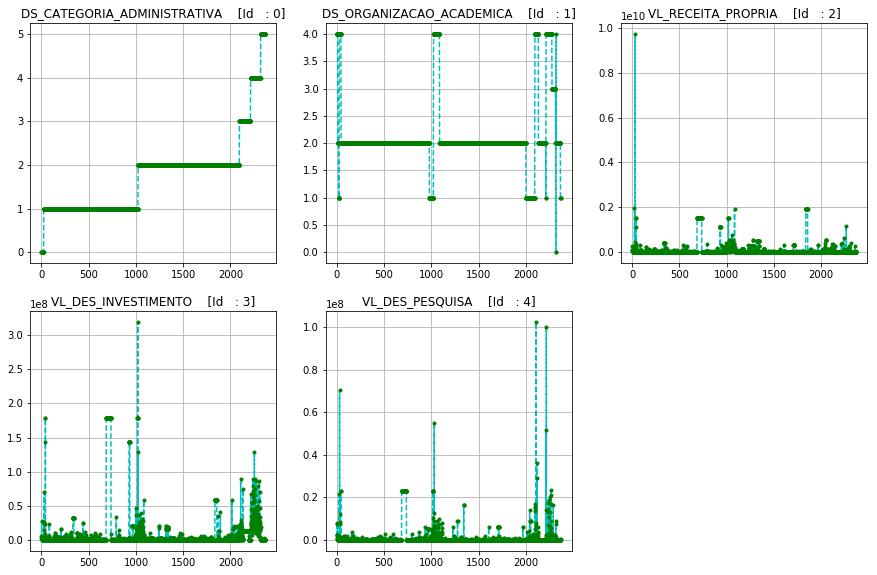

In [29]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

#### 2.3.1 Boxplot

 - It have outliers?
 
 > Yes , every one of they

***Below : 1rst Normalize Data (normal base), 2nd Not Normalize Data***

##### PLOT

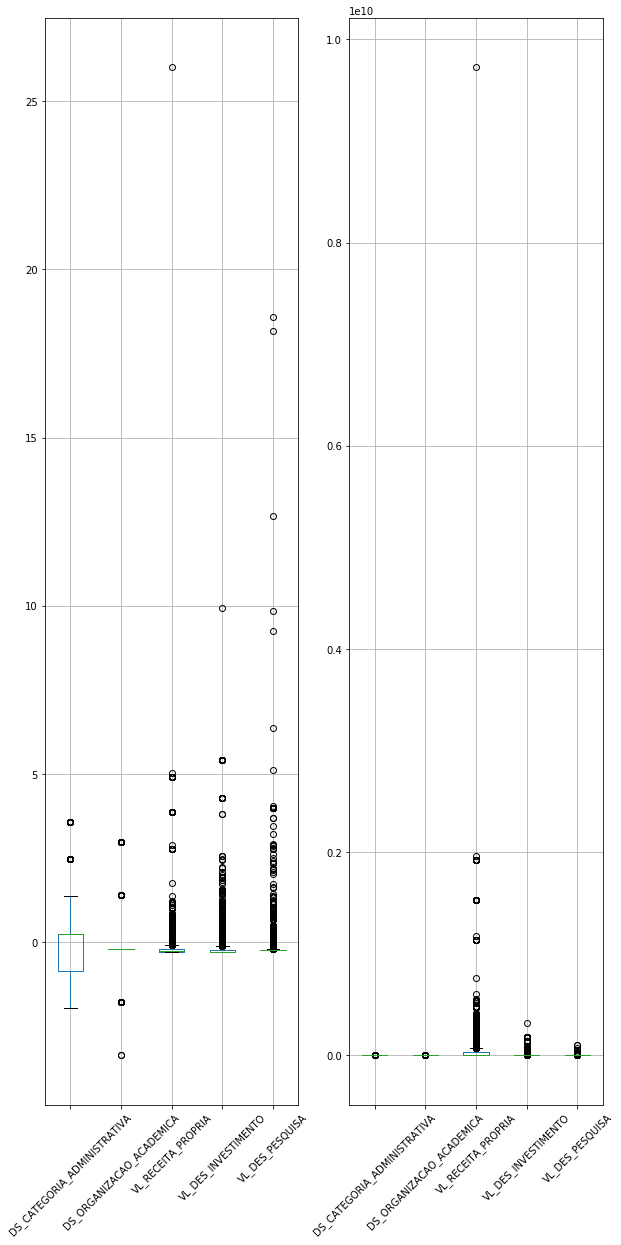

In [30]:
in_normal_base_case_ieducations_dataset = p_plt.to_normal_base(case_ieducations_dataset)

plt.figure(figsize=(10,20))

plt.subplot(1, 2, 1)
in_normal_base_case_ieducations_dataset.boxplot(column=in_normal_base_case_ieducations_dataset.columns[[0,1,2,3,4]].tolist(), rot=45)

plt.subplot(1, 2, 2)
case_ieducations_dataset.boxplot(column=case_ieducations_dataset.columns[[0,1,2,3,4]].tolist(), rot=45)


- the outliers are really Outliers?
    * DS_CATEGORIA_ADMINISTRATIVA : Aparently , Yes. but in this case is irrelevant, because is a column of qualitative data.
    * DS_ORGANIZACAO_ACADEMICA: No. the "outliers" in this case are sub-tipes of "labels" , who depends of the "Avaliable" 
    * VL_RECEITA_PROPRIA: Yes.
    * VL_DES_INVESTIMENTO : Yes
    * VL_DES_PESQUISA: Yes

***See Below for referential data (the main box in boxplot are values between 25% and 75 Quartile)***

In [31]:
stats = case_ieducations_dataset.describe()
print(stats)

       DS_CATEGORIA_ADMINISTRATIVA  DS_ORGANIZACAO_ACADEMICA  \
count                  2368.000000               2368.000000   
mean                      1.760557                  2.116976   
std                       0.906540                  0.630381   
min                       0.000000                  0.000000   
25%                       1.000000                  2.000000   
50%                       2.000000                  2.000000   
75%                       2.000000                  2.000000   
max                       5.000000                  4.000000   

       VL_RECEITA_PROPRIA  VL_DES_INVESTIMENTO  VL_DES_PESQUISA  
count        2.368000e+03         2.368000e+03     2.368000e+03  
mean         1.027341e+08         9.319011e+06     1.253679e+06  
std          3.700200e+08         3.120166e+07     5.455798e+06  
min          0.000000e+00         0.000000e+00     0.000000e+00  
25%          1.307888e+06         0.000000e+00     0.000000e+00  
50%          5.516916e+06  

#### 2.3.2 Moment (1) :>> Mean

In [32]:
mean_ieducations = case_ieducations_dataset.mean()

##### PLOT

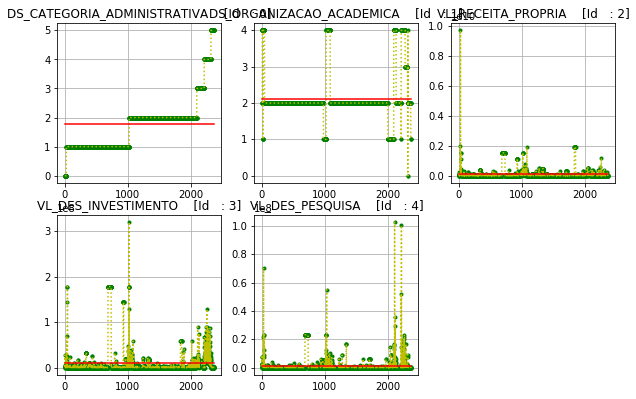

In [33]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['g.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_ieducations.values).show()


#### 2.3.3 Moment(2) :>> Variance

In [34]:
variance_ieducations = case_ieducations_dataset.var()
print("\033[1mVariance (not normalize)\033[0m \n\n", variance_ieducations)

print("\n\n\t\t------\n\n")

in_normal_base_variance_ieducations = in_normal_base_case_ieducations_dataset.var()
print("\033[1mVariance (normalize)\033[0m \n\n", in_normal_base_variance_ieducations)

Variance (not normalize) 

 DS_CATEGORIA_ADMINISTRATIVA    8.218150e-01
DS_ORGANIZACAO_ACADEMICA       3.973796e-01
VL_RECEITA_PROPRIA             1.369148e+17
VL_DES_INVESTIMENTO            9.735437e+14
VL_DES_PESQUISA                2.976574e+13
dtype: float64


		------


Variance (normalize) 

 DS_CATEGORIA_ADMINISTRATIVA    1.0
DS_ORGANIZACAO_ACADEMICA       1.0
VL_RECEITA_PROPRIA             1.0
VL_DES_INVESTIMENTO            1.0
VL_DES_PESQUISA                1.0
dtype: float64




##### PLOT

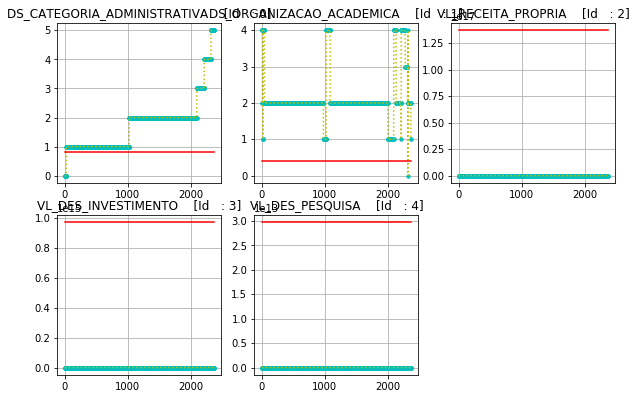

In [35]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True, constant_values=variance_ieducations.values).show()


#### 2.3.4 Moment(3) :>> Skew

In [36]:
skew_ieducations = case_ieducations_dataset.skew()
print(skew_ieducations)

DS_CATEGORIA_ADMINISTRATIVA     1.439786
DS_ORGANIZACAO_ACADEMICA        1.858650
VL_RECEITA_PROPRIA             10.087130
VL_DES_INVESTIMENTO             4.797280
VL_DES_PESQUISA                 8.817944
dtype: float64


#### 2.3.5 Moment(4) :>> Kurtosis

In [37]:
kurt_ieducations = case_ieducations_dataset.kurtosis()
print(kurt_ieducations)

DS_CATEGORIA_ADMINISTRATIVA      2.598781
DS_ORGANIZACAO_ACADEMICA         4.356450
VL_RECEITA_PROPRIA             202.247835
VL_DES_INVESTIMENTO             24.053103
VL_DES_PESQUISA                119.430777
dtype: float64


##### PLOT

C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\10659682\Documents\gitrepos\datamining-p3\personal_plotter.py:118: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  temp_obj.plot(x,mlab.normpdf(x, mu, sigma), "r")
C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\10659682\Documents\gitrepos\datamining-p3\personal_plotter.py:118: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  temp_obj.plot(x,mlab.normpdf(x, mu, sigma), "r")
C:\Users\10659682\Documents\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced

<module 'matplotlib.pyplot' from 'C:\\Users\\10659682\\Documents\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

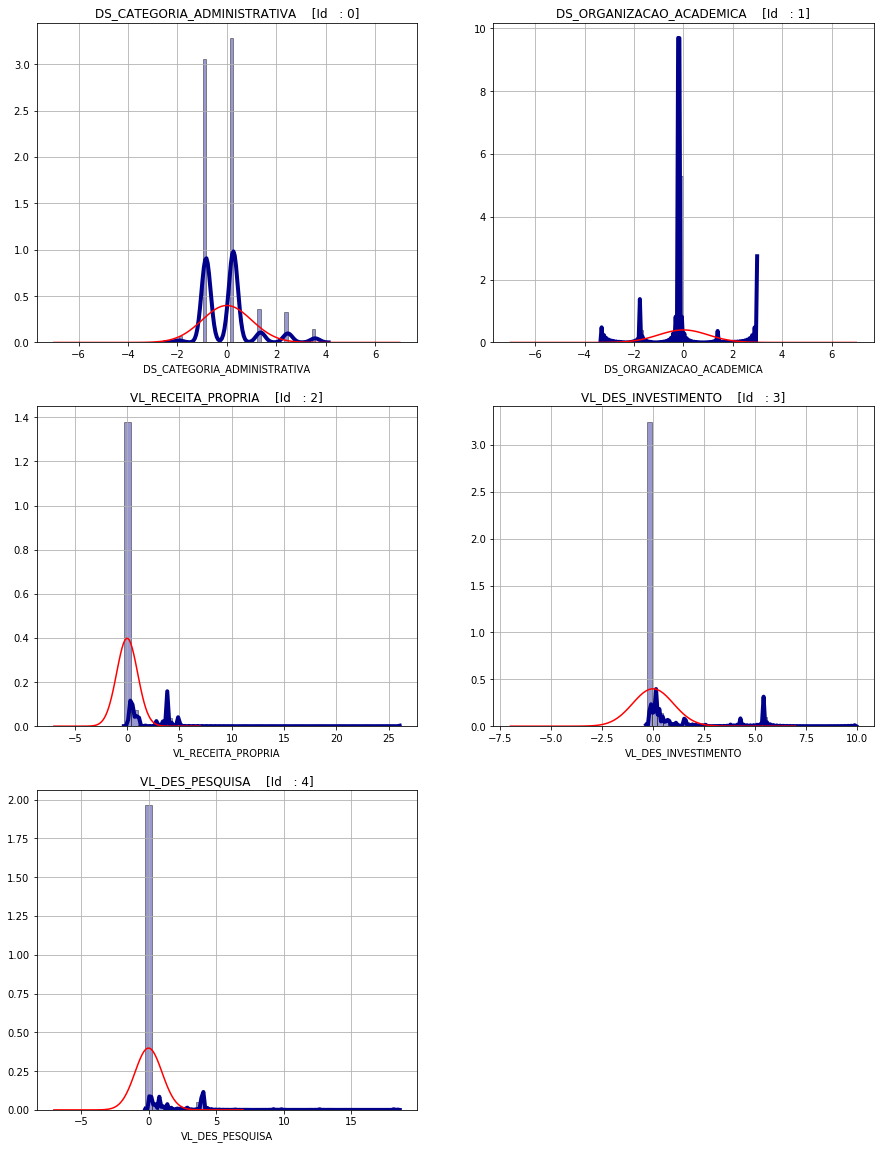

In [38]:
p_plt.skew_demo(in_normal_base_case_ieducations_dataset, 
                plot_size=(15,20), 
                grid_subplot=[3,2],
                grid=True)

#### 2.3.6 Confidence interval

it is possible to see in the plot above the Confidence Interval ( $[μ - 2σ, μ + 2σ]$ )

### 2.4 Hypotesis Related Questions and Answers

#### 2.4.1 are private universities expending less money in research?

in a general way, yes, even if some institutions are in the "higher research budget"  group the amount is not significative enough.

this hypothesis has been reinforced

#### 2.4.2 have public universities less self-capital?

No, in correlation whit other institutions, they self-capital is enough to be considered almost equal to mean (see Kurtosis).

this hypothesis has failed, one time.

#### 2.4.3 are private universities earning more money for his investment?

apparently yes, but still not conclusive.

this hypothesis remains equal.

#### 2.5 Issues

* The data isn't normalize
* Categorical Variables
* Excessive Heterogene Data Set